In [2]:
import numpy as np
import matplotlib.pyplot as plt

#ECM1416-Computational Mathematics Coursework
By Jack Shaw

## Exercise one:
Part(a)
This is the program that performs the transformations on all the points in parts 1-4 induced by the matrix A.

Part(b)
The program applies the a rotation of 330 degrees around the centre of the shape, which is the orgin.

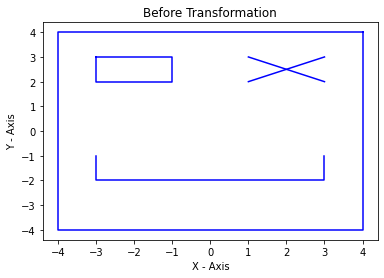

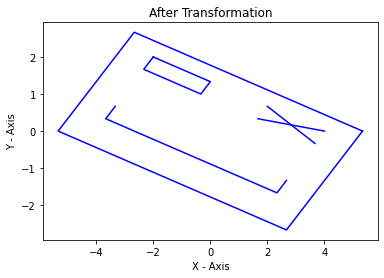

In [ ]:
"""Exercise one"""

def transformation(b: int, point_list: list) -> list:
    """The function to apply the transformation to the points."""
    trans_list = []
    matrix = 1 / b * np.array([[b, 1], [-1, 1]])
    for i in point_list:
        trans_list.append(np.dot(matrix, i))
    return trans_list


def graph(points_list: list, color: str):
    """The function to create graphs using a list of points."""
    x_values = []
    y_values = []

    for i in range(len(points_list)):
        x_values.append(points_list[i][0])
        y_values.append(points_list[i][1])
    plt.plot(x_values, y_values, color=color)


def main():
    """The main program to perform the transformation
     on the points induced by the matrix."""
    a = 4
    b = 3

    point_list1 = [[a, a], [a, -a], [-a, -a], [-a, a], [a, a]]
    point_list2 = [[1 - a, a - 1], [-a / 4, a - 1], [-a / 4, a / 2],
                   [1 - a, a / 2], [1 - a, a - 1]]
    point_list3a = [[a / 4, a - 1], [a - 1, a / 2]]
    point_list3b = [[a - 1, a - 1], [a / 4, a / 2]]
    point_list4 = [[a - 1, -a / 4], [a - 1, -a / 2], [1 - a, -a / 2],
                   [1 - a, -a / 4]]

    plt.figure(1)
    graph(point_list1, 'b')
    graph(point_list2, 'b')
    graph(point_list3a, 'b')
    graph(point_list3b, 'b')
    graph(point_list4, 'b')
    plt.xlabel("X - Axis")
    plt.ylabel("Y - Axis")
    plt.title("Before Transformation")

    trans_list1 = transformation(b, point_list1)
    trans_list2 = transformation(b, point_list2)
    trans_list3a = transformation(b, point_list3a)
    trans_list3b = transformation(b, point_list3b)
    trans_list4 = transformation(b, point_list4)

    plt.figure(2)
    graph(trans_list1, 'b')
    graph(trans_list2, 'b')
    graph(trans_list3a, 'b')
    graph(trans_list3b, 'b')
    graph(trans_list4, 'b')
    plt.xlabel("X - Axis")
    plt.ylabel("Y - Axis")
    plt.title("After Transformation")

    plt.show()


if __name__ == '__main__':
    main()


## Exercise one:
Part(a)

Part(b)
The analytical results can be worked out by intergrating the equation. To do this with a partial differential equation the y on the right hand side is considered to be a constant. 

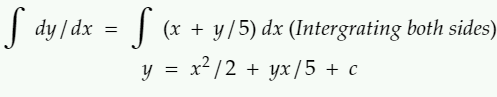

With a step size of 1, the analytical method (the approximation) is constantly higher than the numerical method (the true values). There is quite a large error between the analytical method and numerical method with this absolute error increasing with each step. An anomaly to this trend is the last value (1.757) has a lower absolute error then the previous (1.981).

With a step size of 0.2, the analytical method is quite accurately approximating the numerical method. This is true until the higher values of x where the error increases significantly. This absolute error reaches 2.148.

With a step size of 0.05, the analytical method is very accurately approximating the numerical method. This is true until x is greater than 3 where the error increases significantly. The numerical method constantly overestimates the true values. 

X Value:  0.0
Absolute Error:  0.0
Relative Error:  0.0 %
X Value:  1.0
Absolute Error:  0.5
Relative Error:  16.13 %
X Value:  2.0
Absolute Error:  1.12
Relative Error:  50.91 %
X Value:  3.0
Absolute Error:  1.684
Relative Error:  561.33 %
X Value:  4.0
Absolute Error:  1.981
Relative Error:  76.18 %
X Value:  5.0
Absolute Error:  1.757
Relative Error:  27.03 %


X Value:  0.0
Absolute Error:  0.0
Relative Error:  0.0 %
X Value:  0.2
Absolute Error:  0.02
Relative Error:  0.65 %
X Value:  0.4
Absolute Error:  0.045
Relative Error:  1.42 %
X Value:  0.6
Absolute Error:  0.073
Relative Error:  2.3 %
X Value:  0.8
Absolute Error:  0.103
Relative Error:  3.26 %
X Value:  1.0
Absolute Error:  0.134
Relative Error:  4.31 %
X Value:  1.2
Absolute Error:  0.163
Relative Error:  5.43 %
X Value:  1.4
Absolute Error:  0.19
Relative Error:  6.63 %
X Value:  1.6
Absolute Error:  0.211
Relative Error:  7.89 %
X Value:  1.8
Absolute Error:  0.227
Relative Error:  9.23 %
X Value:  2.0
Absolute Error

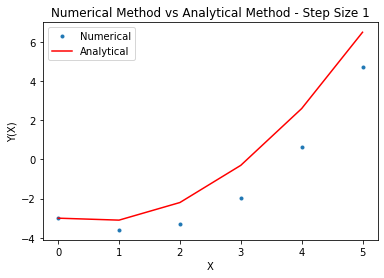

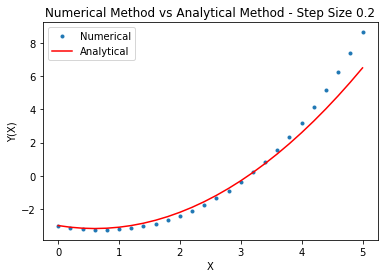

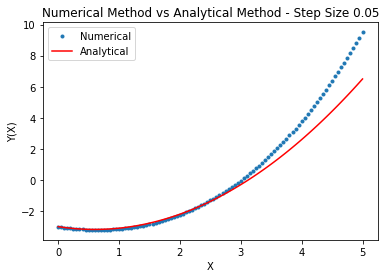

In [29]:
"""Exercise two"""

def relative_error(absolute: float, actual: float) -> float:
    """Function used to calculate the relative error."""
    error = (absolute / abs(actual)) * 100
    return error


def absolute_error(actual: float, approximation: float) -> float:
    """Function used to calculate the actual error."""
    error = abs(actual - approximation)
    return error


def print_error(x: list, numerical: list, analytical: list):
    """This will print both the absolute and relative errors
     of a list of approximations and real values."""
    for index in range(0, len(analytical)):
        abs_error = absolute_error(analytical[index], numerical[index])
        rel_error = relative_error(abs_error, analytical[index])
        print("X Value: ", round(x[index], 2))
        print("Absolute Error: ", round(abs_error, 3))
        print("Relative Error: ", round(rel_error, 2), "%")
    print("\n")


def euler_method(f, y0, x):
    """The function to apply the euler's method to approximate
     a solution for a differential equation."""
    y = np.zeros(len(x))
    # A list of zeros so that the next value in in the list can be overwritten.
    y[0] = y0
    for n in range(0, len(x) - 1):
        y[n + 1] = y[n] + f(y[n], x[n]) * (x[n + 1] - x[n])
    return y


def create_x(interval: list, h: float):
    """This function is to create the values of x depending
     on the interval or the step size."""
    n = round(interval[1] / h + 1)
    x = np.linspace(interval[0], interval[1], n)
    return x


def differential_equation():
    """This is the differential equation to be approximated."""
    return lambda y, x: x + y / 5


def main():
    """The main function where the graphing and """
    y0 = -3
    interval = [0, 5]
    diff = differential_equation()

    h = 1.0
    x_list1 = create_x(interval, h)
    numerical_one = euler_method(diff, y0, x_list1)  # approximation

    h = 0.2
    x_list2 = create_x(interval, h)
    numerical_two = euler_method(diff, y0, x_list2)

    h = 0.05
    x_list3 = create_x(interval, h)
    numerical_three = euler_method(diff, y0, x_list3)

    numerical_label = "Numerical"
    analytical_label = "Analytical"

    plt.figure(1)
    y = -3
    y = (x_list1 * x_list1) / 2 + (y * x_list1) / 5 - 3
    plt.plot(x_list1, numerical_one, ".", label=numerical_label)
    plt.plot(x_list1, y, "r", label=analytical_label)
    print_error(x_list1, numerical_one, y)
    plt.xlabel("X")
    plt.ylabel("Y(X)")
    plt.title("Numerical Method vs Analytical Method - Step Size 1")
    plt.legend()

    plt.figure(2)
    y = -3
    y = (x_list2 * x_list2) / 2 + (y * x_list2) / 5 - 3
    plt.plot(x_list2, numerical_two, ".", label=numerical_label)
    plt.plot(x_list2, y, "r", label=analytical_label)
    print_error(x_list2, numerical_two, y)
    plt.xlabel("X")
    plt.ylabel("Y(X)")
    plt.title("Numerical Method vs Analytical Method - Step Size 0.2")
    plt.legend()

    plt.figure(3)
    y = -3
    y = ((x_list3 * x_list3) / 2) + ((y * x_list3) / 5) - 3
    plt.plot(x_list3, numerical_three, ".", label=numerical_label)
    plt.plot(x_list3, y, "r", label=analytical_label)
    print_error(x_list3, numerical_three, y)
    plt.xlabel("X")
    plt.ylabel("Y(X)")
    plt.title("Numerical Method vs Analytical Method - Step Size 0.05")
    plt.legend()

    plt.show()


if __name__ == '__main__':
    main()
